# The normal distribution - wrong but useful

We're going to look at some real-world data and see if we can use a normal distribution to model it.

While we're doing this, we're also going to learn some Python programming.

## The normal distribution

It's really well-known that the normal distribution has probability density function

$$f(x) = \frac{1}{σ \sqrt{2 \pi}} e^{\frac{1}{2} (\frac{x - μ}{σ})^2}$$

We are going to plot this function using Python.

First we will import two important packages `numpy`, whose name is short for "numerical Python", which we will shorten further to `np`; and `pandas`, whose name is short for "panel data" (not monochrome bamboo-eating bears), which we will shorten to `pd`. We will also import one function called `norm` from the scientific Python package `scipy`.

In [2]:
import numpy as np
import pandas as pd
from scipy.stats import norm
import statsmodels.api as sm

Using `numpy`'s `linspace` function, we can create a linearly-spaced vector so that we can plot the function.

In [3]:
MU, SIGMA, SIZE = 4, 2, 10
np.linspace(MU - 3*SIGMA, MU + 3*SIGMA, SIZE)

array([-2.        , -0.66666667,  0.66666667,  2.        ,  3.33333333,
        4.66666667,  6.        ,  7.33333333,  8.66666667, 10.        ])

The output is in the form of a `numpy` array, which is fine but we can make things easier by making it into a `pandas` dataframe, which we will call `df`.

In [4]:
MU, SIGMA, SIZE = 4, 2, 10
df = pd.DataFrame(np.linspace(MU - 3*SIGMA, MU + 3*SIGMA, SIZE), columns=['x'])
df

,x
0,-2.000000
1,-0.666667
2,0.666667
3,2.000000
4,3.333333
5,4.666667
6,6.000000
7,7.333333
8,8.666667
9,10.000000


You can think of a dataframe like an Excel worksheet but with some restrictions. Viewing it gives a much nicer output than the `numpy` array does.

We are now going to add a column to the dataframe with the normal pdf evaluated for each x-value.

In [5]:
MU, SIGMA, SIZE = 4, 2, 10
df = pd.DataFrame(np.linspace(MU - 3*SIGMA, MU + 3*SIGMA, SIZE), columns=['x'])
df['f(x)'] = norm.pdf(df['x'], MU, SIGMA)
df

,x,f(x)
0,-2.000000,0.002216
1,-0.666667,0.013111
2,0.666667,0.049739
3,2.000000,0.120985
4,3.333333,0.188692
5,4.666667,0.188692
6,6.000000,0.120985
7,7.333333,0.049739
8,8.666667,0.013111
9,10.000000,0.002216


Now we can plot the curve, increasing the size of the vectors for a smoother plot.

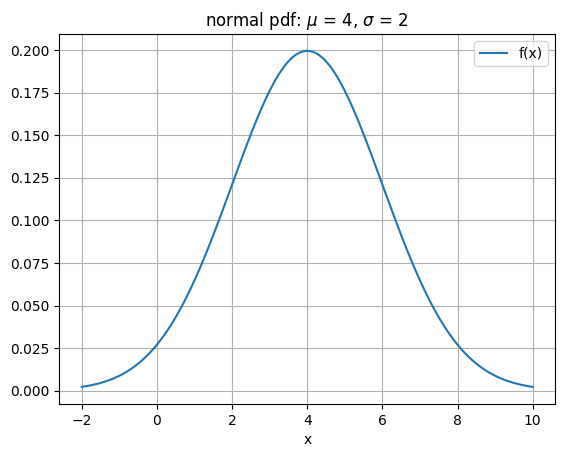

In [6]:
MU, SIGMA, SIZE = 4, 2, 200
df = pd.DataFrame(np.linspace(MU - 3*SIGMA, MU + 3*SIGMA, SIZE), columns=['x'])
df['f(x)'] = norm.pdf(df['x'], MU, SIGMA)
df.plot(x='x', y='f(x)', grid=True,
        title=f'normal pdf: $\mu$ = {MU}, $\sigma$ = {SIGMA}');

The `plot` command that we used is what is known as a "method" of the dataframe object, `df`. It makes plotting data quick and easy and much of the labelling is automatic.

There is a comprehensive library of real-world data that can be found [here](https://vincentarelbundock.github.io/Rdatasets/articles/data.html).

In [8]:
babies = sm.datasets.get_rdataset(dataname="babies", package="openintro")

We can view the documentation for the "babies" dataset like this.

In [12]:
help(babies)

Help on Dataset in module statsmodels.datasets.utils:

<class 'statsmodels.datasets.utils.Dataset'>
    .. container::
    
    .. container::
    
       ====== ===============
       babies R Documentation
       ====== ===============
    
       .. rubric:: The Child Health and Development Studies
          :name: the-child-health-and-development-studies
    
       .. rubric:: Description
          :name: description
    
       The Child Health and Development Studies investigate a range of
       topics. One study, in particular, considered all pregnancies
       between 1960 and 1967 among women in the Kaiser Foundation Health
       Plan in the San Francisco East Bay area. We do not have ideal
       provenance for these data. For a better documented and more recent
       dataset on a similar topic with similar variables, see births14.
       Additionally, ``Gestation`` dataset in the
       `mosaicData <https://CRAN.R-project.org/package=mosaicData>`__
       package also co

This data was collected to investigate the factors that affect the birthweight, with implications for infant health. We are not going to attempt this but, instead, we will look at some of the data to see if it can be modelled by a normal distribution.

There is a pandas data frame that is contained in the "babies" object. We can look at its first 5 rows by typing

In [21]:
babies.data.head()

,case,bwt,gestation,parity,age,height,weight,smoke
0,1,120,284.0,0,27.0,62.0,100.0,0.0
1,2,113,282.0,0,33.0,64.0,135.0,0.0
2,3,128,279.0,0,28.0,64.0,115.0,1.0
3,4,123,NaN,0,36.0,69.0,190.0,0.0
4,5,108,282.0,0,23.0,67.0,125.0,1.0


The first variable that we will investigate is the mother's height.

In [24]:
height = babies.data['height']
height.head()

0    62.0
1    64.0
2    64.0
3    69.0
4    67.0
Name: height, dtype: float64

Looking at the first 5 rows of data with the `head()` method, it looks like the height has been measured to the nearest inch. This rounding may cause us some problems but we will carry on anyway. The output also looks a little different because we now have a `pandas` series object instead of a dataframe.

Let's see what we've got with some descriptive statistics.

In [14]:
height.describe()

count    1214.000000
mean       64.047776
std         2.533409
min        53.000000
25%        62.000000
50%        64.000000
75%        66.000000
max        72.000000
Name: height, dtype: float64

Due to the rounding of the data, we will use bin edges that go from 0.5 below the minimum value of 53 to 0.5 above the maximum value of 72. The `numpy` `arange` function is a nice way of doing this.

In [20]:
np.arange(start=52.5, stop=72.5, step=1)

array([52.5, 53.5, 54.5, 55.5, 56.5, 57.5, 58.5, 59.5, 60.5, 61.5, 62.5,
       63.5, 64.5, 65.5, 66.5, 67.5, 68.5, 69.5, 70.5, 71.5])

Whoops, that didn't quite work. It's because Python ranges stop at the value immediately before the "stop" value. We need to put `stop=73.5` to get the result that we want.

We can now use the `pandas` `hist` method to get a histogram, where we will use the `density=True` option to get probability density on the y-axis.

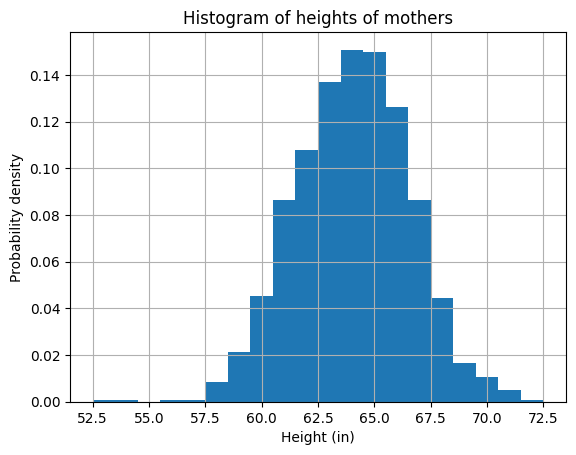

In [28]:
ax = height.hist(
    bins=np.arange(start=52.5, stop=73.5, step=1),
    density=True)
ax.set_xlabel("Height (in)")
ax.set_ylabel("Probability density")
ax.set_title("Histogram of heights of mothers");

The `ax` object in the above code can be used to add a normal distribution "bell curve" to the plot.

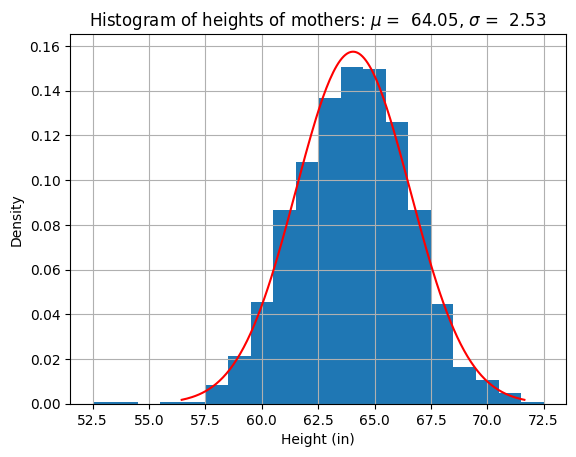

In [32]:
mu, sigma = height.mean(), height.std()
SIZE = 200
ax = height.hist(
    bins=np.arange(start=52.5, stop=73.5, step=1),
    density=True)
ax.set_xlabel("Height (in)")
ax.set_ylabel("Density")
ax.set_title(
    "Histogram of heights of mothers: " +
    f"$\mu$ = {mu: .2f}, $\sigma$ = {sigma: .2f}"
    )
x = np.linspace(mu - 3*sigma, mu + 3*sigma, SIZE)
y = norm.pdf(x, mu, sigma)
ax.plot(x, y, 'r-');

So the normal distribution looks like a good model for our data. We could repeat this analysis for some of the other columns. It would, however, be nicer if we could write some code that automates our process in a natural way. We will look at how to do this in the next session.